# About the dataset

It appears that you have provided a dataset consisting of various risk factors and their corresponding classifications as "bankruptcy" or "non-bankruptcy." Each risk factor has a numerical value assigned to it. Here is a breakdown of the variables in your dataset:

industrial_risk: A measure of the industrial risk associated with a company.

management_risk: A measure of the management risk associated with a company.

financial_flexibility: A measure of the financial flexibility of a company.

credibility: A measure of the credibility of a company.

competitiveness: A measure of the competitiveness of a company.

operating_risk: A measure of the operating risk associated with a company.

class: The classification of the company as "bankruptcy" or "non-bankruptcy."

Each row represents a company, and the values in each row represent the corresponding risk factor values and the classification of the company.

For example, the first row suggests that the company has a moderate industrial risk (0.5), high management risk (1), no financial flexibility (0), no credibility (0), no competitiveness (0), moderate operating risk (0.5), and it is classified as "bankruptcy."

Similarly, each subsequent row represents a different company with its corresponding risk factor values and classification. It seems like you may have a dataset related to predicting bankruptcy or financial distress of companies based on these risk factors. If you have any specific questions or need further assistance, please let me know!

**Outlining the steps we'll follow:**

1. Load the dataset and perform necessary data preprocessing.
2. Handle missing values.
3. Encode categorical variables.
4. Split the data into training and testing sets.
5. Train a machine learning model on the training data.
6. Evaluate the model's performance on the testing data.

# Loading important libraries

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importing the Bankrupt Dataset

In [25]:
bankrupt = pd.read_csv('elr_data1.csv', sep = ';', header = 0)
bankrupt

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


In [26]:
bankrupt.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
print(bankrupt.info())
print(bankrupt.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   industrial_risk         250 non-null    float64
 1    management_risk        250 non-null    float64
 2    financial_flexibility  250 non-null    float64
 3    credibility            250 non-null    float64
 4    competitiveness        250 non-null    float64
 5    operating_risk         250 non-null    float64
 6    class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB
None
(250, 7)


## checking is there any missing values are there in data or not

In [28]:
bankrupt.isnull().sum()

industrial_risk           0
 management_risk          0
 financial_flexibility    0
 credibility              0
 competitiveness          0
 operating_risk           0
 class                    0
dtype: int64

In [29]:
# there are no any null values in the data set

In [30]:
bankrupt_new = bankrupt.iloc[:,:]
bankrupt_new

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


In [31]:
bankrupt_new["class_yn"] = 1
bankrupt_new

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class,class_yn
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy,1
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy,1
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy,1
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy,1
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy,1
...,...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy,1
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy,1
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy,1
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy,1


## Here we are changing  the target variable to bankruptcy = 0, non-bankruptcy = 1

In [32]:
#Changing Non-bankruptcy as 0 and bankruptcy as 1
bankrupt_new.loc[bankrupt[' class'] == 'bankruptcy', 'class_yn'] = 0

In [33]:
bankrupt_new

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class,class_yn
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy,0
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy,0
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy,0
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy,0
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy,0
...,...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy,1
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy,1
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy,1
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy,1


In [34]:
bankrupt_new.drop(' class', inplace = True, axis =1)
bankrupt_new.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class_yn
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0


# Exploratory Data Analysis (EDA)


In [35]:
bankrupt_new.corr()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class_yn
industrial_risk,1.000000,0.255127,-0.162624,-0.014438,-0.257814,0.144507,-0.227823
management_risk,0.255127,1.000000,-0.254845,-0.303341,-0.306568,0.213874,-0.370838
financial_flexibility,-0.162624,-0.254845,1.000000,0.524951,0.686612,-0.116903,0.751020
credibility,-0.014438,-0.303341,0.524951,1.000000,0.675689,-0.288458,0.755909
competitiveness,-0.257814,-0.306568,0.686612,0.675689,1.000000,-0.211383,0.899452
operating_risk,0.144507,0.213874,-0.116903,-0.288458,-0.211383,1.000000,-0.279786
class_yn,-0.227823,-0.370838,0.751020,0.755909,0.899452,-0.279786,1.000000


<Axes: >

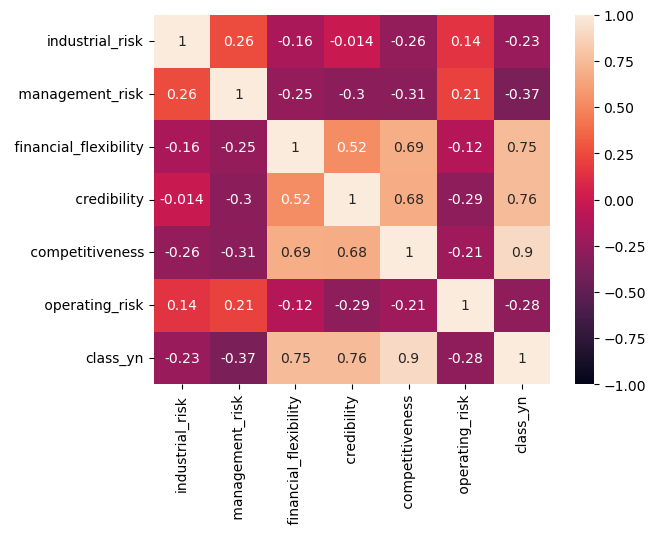

In [36]:
sns.heatmap(bankrupt_new.corr(), vmin = -1, vmax = 1, annot = True)

<Axes: xlabel='class_yn', ylabel='count'>

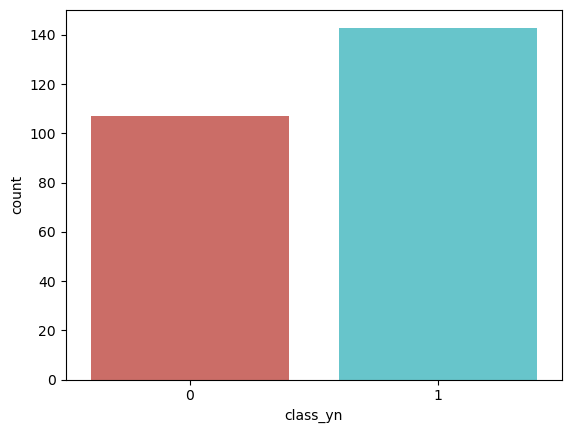

In [37]:
sns.countplot(x = 'class_yn', data = bankrupt_new, palette = 'hls')

<Axes: xlabel=' financial_flexibility', ylabel='count'>

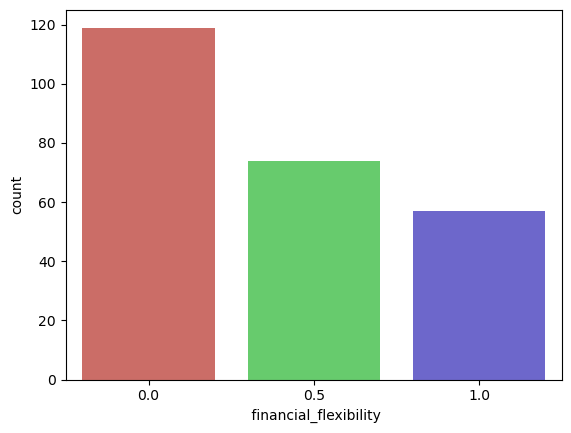

In [38]:
sns.countplot(x = ' financial_flexibility', data = bankrupt_new, palette = 'hls')

<Axes: xlabel='class_yn'>

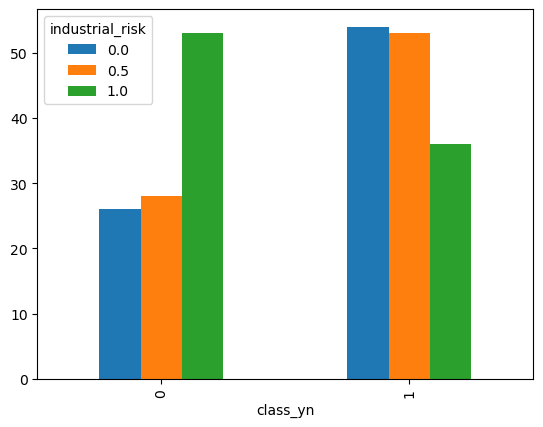

In [39]:
# for visualization 

pd.crosstab(bankrupt.class_yn, bankrupt.industrial_risk).plot(kind='bar')

In [40]:
bankrupt_new.columns

Index(['industrial_risk', ' management_risk', ' financial_flexibility',
       ' credibility', ' competitiveness', ' operating_risk', 'class_yn'],
      dtype='object')

<Axes: xlabel=' financial_flexibility'>

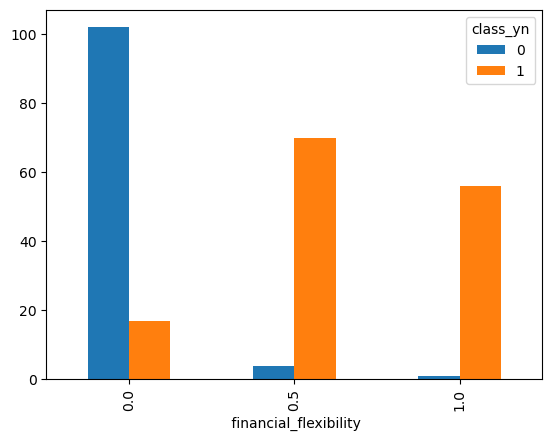

In [41]:
pd.crosstab(bankrupt_new[' financial_flexibility'], bankrupt_new['class_yn']).plot(kind = 'bar')


<Axes: xlabel=' credibility'>

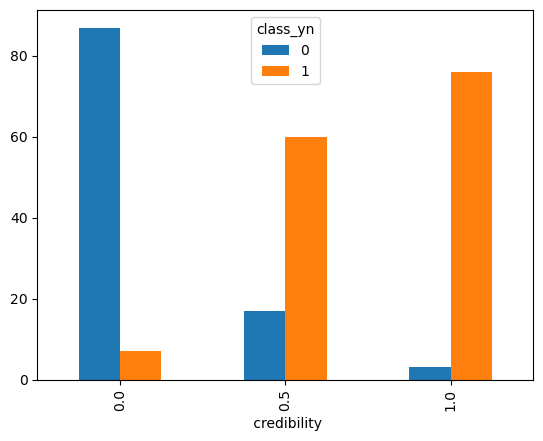

In [42]:
pd.crosstab(bankrupt_new[' credibility'], bankrupt_new.class_yn).plot(kind = 'bar')

<Axes: xlabel=' operating_risk'>

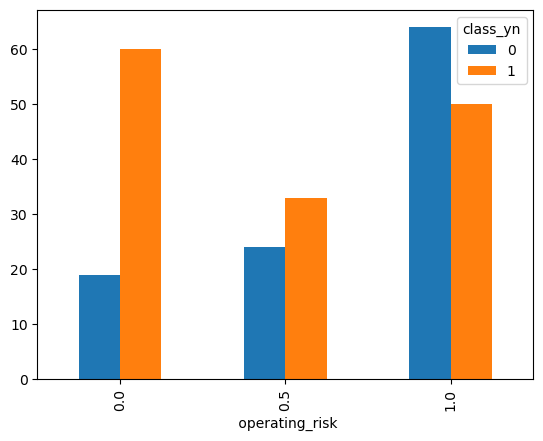

In [43]:
pd.crosstab(bankrupt_new[' operating_risk'], bankrupt_new.class_yn).plot(kind='bar')

<Axes: xlabel=' financial_flexibility'>

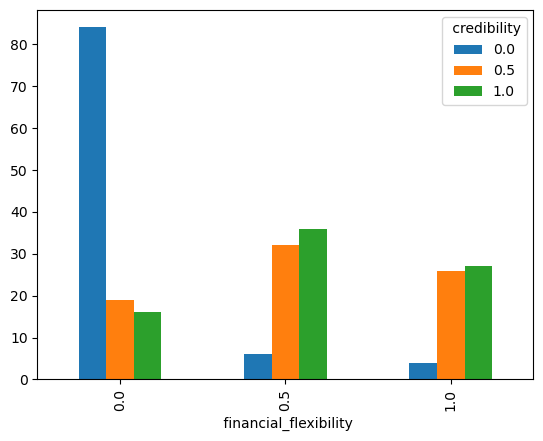

In [44]:
pd.crosstab(bankrupt_new[' financial_flexibility'], bankrupt_new[' credibility']).plot(kind = 'bar')


In [45]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification

In [46]:
# Input
x = bankrupt_new.iloc[:,:-1]

# Target variable

y = bankrupt_new.iloc[:,-1]

In [47]:
model=ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier()

In [48]:
print(model.feature_importances_)

[0.01716297 0.03538204 0.23339098 0.21632134 0.47498335 0.02275932]


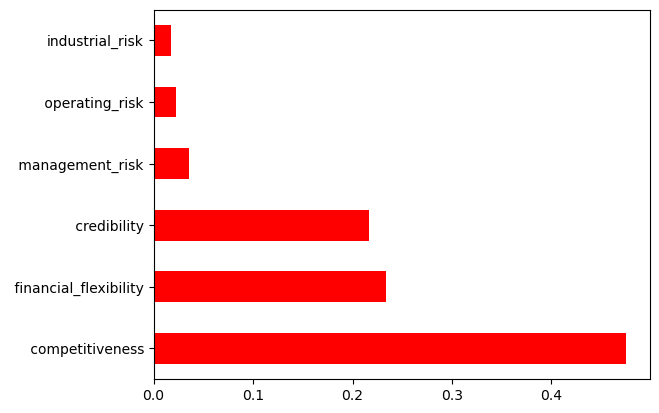

In [49]:
fimp=pd.Series(model.feature_importances_,index=x.columns)
fimp.nlargest(6).plot(kind='barh',color='r')
plt.show()

**The features financial flexibility, compititiveness and credibility influences the class more like being bankrupt or not the other features doesn't show much variation compared to these.**

In [50]:
np.shape(bankrupt_new)

(250, 7)

**dividing the columns in the dataset into X(features) and Y(target variable)**

In [51]:
from sklearn.model_selection import train_test_split # trian and test
from sklearn import metrics
from sklearn import preprocessing 
from sklearn.metrics import classification_report

### Sliptting the data into train and test


In [52]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 0)

In [54]:
x_train

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
227,1.0,1.0,0.5,1.0,1.0,1.0
181,0.5,0.5,0.5,0.5,0.5,0.0
228,1.0,1.0,1.0,0.5,0.5,1.0
33,0.0,1.0,0.0,0.0,0.0,1.0
202,0.0,0.0,1.0,0.5,1.0,1.0
...,...,...,...,...,...,...
67,1.0,1.0,0.0,0.5,0.0,1.0
192,0.5,1.0,0.0,0.0,1.0,0.0
117,0.0,0.0,1.0,1.0,0.5,0.0
47,1.0,1.0,0.0,0.0,0.0,1.0


In [55]:
x_test

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
225,0.0,0.0,1.0,1.0,0.5,0.0
122,1.0,1.0,0.5,1.0,0.5,1.0
92,0.5,1.0,0.0,0.0,0.0,0.5
157,0.0,0.5,1.0,0.5,1.0,1.0
154,0.5,0.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...
188,0.5,0.0,0.5,1.0,0.5,0.0
15,0.5,1.0,0.0,0.0,0.0,0.5
217,0.5,0.5,0.5,0.5,0.5,0.5
74,1.0,0.5,0.0,0.0,0.0,0.0


In [56]:
x_test.shape

(63, 6)

In [57]:
y_train

227    1
181    1
228    1
33     0
202    1
      ..
67     0
192    1
117    1
47     0
172    1
Name: class_yn, Length: 187, dtype: int64

In [59]:
y_test

225    1
122    1
92     0
157    1
154    1
      ..
188    1
15     0
217    1
74     0
7      0
Name: class_yn, Length: 63, dtype: int64

# Preparing models
## 1. Logistic Regression

In [60]:
from sklearn.linear_model import LogisticRegression

logisticlassifier = LogisticRegression() 

In [61]:
logisticlassifier.fit(x_train, y_train)

logisticlassifier.coef_ # coefficients of features


array([[-0.43044914, -0.73309162,  2.37729553,  2.31022854,  3.68601327,
        -0.53101906]])

###  After the traing the model then we prediction on test data


In [62]:
y_pred = logisticlassifier.predict(x_test)
y_pred

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0],
      dtype=int64)

### let's test the performance of our model - confusion matrix


In [63]:
from sklearn.metrics import confusion_matrix

confusion_logist = confusion_matrix(y_test, y_pred)

confusion_logist
 

array([[26,  0],
       [ 0, 37]], dtype=int64)

In [64]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score

# THRESHOLD SELECTION

proba = logisticlassifier.predict_proba(x_test)[:,1]
proba

array([0.98962296, 0.84217767, 0.03967206, 0.98723317, 0.99651047,
       0.95992721, 0.99219799, 0.05897828, 0.05897828, 0.87213947,
       0.99834242, 0.91391587, 0.62700905, 0.87709553, 0.98299294,
       0.03780002, 0.9605678 , 0.93520412, 0.99471295, 0.02490754,
       0.99350623, 0.03780002, 0.96119743, 0.99104169, 0.98900629,
       0.02490754, 0.12118794, 0.0956312 , 0.58072754, 0.02490754,
       0.98680354, 0.04370552, 0.99834242, 0.9605678 , 0.99311626,
       0.99567611, 0.97611777, 0.0956312 , 0.03780002, 0.98744259,
       0.99475709, 0.03070518, 0.90149673, 0.9605678 , 0.03070518,
       0.0956312 , 0.96898173, 0.07736394, 0.03223762, 0.99245334,
       0.02490754, 0.94496339, 0.97141729, 0.03223762, 0.12118794,
       0.07500403, 0.84217767, 0.03070518, 0.9590604 , 0.03967206,
       0.79684431, 0.05897828, 0.03223762])

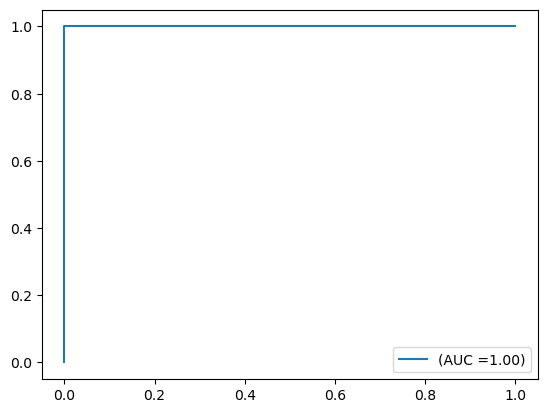

In [65]:
auc = roc_auc_score(y_test,proba)
fpr,tpr, threshold = roc_curve(y_test,proba)

plt.plot(fpr,tpr,label ='(AUC =%0.2f)'%auc)
plt.legend()

###  Accuracy of a Model

In [66]:
# Train Accuracy

train_acc_logist = np.mean(logisticlassifier.predict(x_train)== y_train)
train_acc_logist

0.9946524064171123

In [67]:
# Test Accuracy

test_acc_logist = np.mean(logisticlassifier.predict(x_test)== y_test)
test_acc_logist

1.0

In [68]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        37

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63



In [69]:
from sklearn.metrics import accuracy_score

logistic_acc = accuracy_score(y_test, y_pred)
logistic_acc

1.0

### Accuracy of overall model

In [70]:
logisticlassifier.fit(x, y)

logisticlassifier.coef_ # coefficients of features



array([[-0.5741981 , -0.75397787,  2.61063166,  2.41434068,  4.00955826,
        -0.51358089]])

In [71]:
y_pred = logisticlassifier.predict(x)

confusion_matrix = confusion_matrix(y, y_pred)
confusion_matrix


array([[106,   1],
       [  0, 143]], dtype=int64)

In [72]:
acc = accuracy_score(y, y_pred)
acc

0.996

In [73]:
logisticlassifier.score(x_test, y_test)

1.0

In [74]:
logisticlassifier.score(x_train, y_train)

0.9946524064171123

### From the accuracy we can say that the model is overfitted to avoid overfit problem we use Regularozation method
#### here we have L1, L2 regularization
##### It turns out they have different but equally useful properties. From a practical standpoint, L1 tends to shrink coefficients to zero whereas L2 tends to shrink coefficients evenly. L1 is therefore useful for feature selection, as we can drop any variables associated with coefficients that go to zero.
#### L1 = lasso regularization

In [75]:
from sklearn import linear_model

lasso_reg = linear_model.Lasso(alpha = 50, max_iter = 100, tol =0.1)

lasso_reg.fit(x_train, y_train)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [76]:
lasso_reg.score(x_test, y_test)

-0.0017265366431771234

In [77]:
lasso_reg.score(x_train, y_train)

0.0

#### L2 = Ridge regularization 

In [78]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha = 50, max_iter = 100, tol = 0.1)

ridge_reg.fit(x_train, y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [79]:
ridge_reg.score(x_test, y_test)

0.768839856224332

In [80]:
ridge_reg.score(x_train, y_train)

0.7452859981668727

# 2. KNN Model

In [81]:
from sklearn.neighbors import KNeighborsClassifier as KNC
import warnings
warnings.filterwarnings('ignore')

### To choose k value 

In [82]:
import math
math.sqrt(len(y_test))

7.937253933193772

Here we are choosing the k value to be  7 (choosing odd value)

Define the model KNN and fit model

In [83]:
KNN_classifier = KNC(n_neighbors =7, p = 2, metric = 'euclidean')

In [84]:
KNN_classifier.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=7)

#### Predict the Test set results

In [85]:
y_pred = KNN_classifier.predict(x_test)
y_pred

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0],
      dtype=int64)

#### Evaluate model

In [86]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[26  0]
 [ 1 36]]


In [87]:
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred))

0.9863013698630138


#### Accuracy of KNN model


In [88]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

KNN_acc = accuracy_score(y_test, y_pred)
KNN_acc

0.9841269841269841

In [89]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        26
           1       1.00      0.97      0.99        37

    accuracy                           0.98        63
   macro avg       0.98      0.99      0.98        63
weighted avg       0.98      0.98      0.98        63



# 3. Naive Bayes Classifier

In [90]:
from sklearn.naive_bayes import GaussianNB

from sklearn.naive_bayes import MultinomialNB


#### Creating GaussianNB and MultinomialNB functions


In [91]:
GNB = GaussianNB()
MNB = MultinomialNB()

#### Building the model with GaussianNB


In [92]:
Naive_GNB = GNB.fit(x_train ,y_train)

y_pred = Naive_GNB.predict(x_test)
y_pred

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0],
      dtype=int64)

#### Evaluate Model

In [93]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[26  0]
 [ 0 37]]


#### Accuracy of GNB

In [94]:
from sklearn.metrics import accuracy_score

GNB_acc = accuracy_score(y_test , y_pred)
GNB_acc

1.0

#### Building the model with MultinomialNB


In [95]:
Naive_MNB = MNB.fit(x_train ,y_train)

y_pred = Naive_MNB.predict(x_test)
y_pred

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0],
      dtype=int64)

#### Evaluating Model


In [96]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[26  0]
 [ 0 37]]


#### Accuracy of MNB

In [97]:
from sklearn.metrics import accuracy_score

MNB_acc = accuracy_score(y_test , y_pred)
MNB_acc

1.0

In [98]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        37

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63



# 4. Support Vector Machine

In [99]:
from sklearn.svm import SVC


#### Kernel = Linear model

In [100]:
model_linear = SVC(kernel = 'linear')

model_linear.fit(x_train, y_train)

pred_test_linear = model_linear.predict(x_test)

np.mean(pred_test_linear==y_test)



1.0

#### Kernel = ploy model

In [101]:
model_poly = SVC(kernel = "poly")
model_poly.fit(x_train,y_train)
pred_test_poly = model_poly.predict(x_test)

np.mean(pred_test_poly==y_test) # Accuracy

0.9841269841269841

#### Kernel = 'rbf' model --> Radial Basis Function 

In [102]:
model_rbf = SVC(kernel = "rbf")
model_rbf.fit(x_train,y_train)
pred_test_rbf = model_rbf.predict(x_test)

np.mean(pred_test_rbf==y_test) # Accuracy

1.0

from the above kernels in SVM polynomial kernel giving good accuracy


In [103]:
import pickle
pickle_out = open("model_poly.pkl","wb")
pickle.dump(model_poly, pickle_out)
pickle_out.close()

# 4. Decision Tree

In [109]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
dt= DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
y_pred

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0],
      dtype=int64)

In [110]:
print(f"Training Accuracy : {dt.score(x_train,y_train)}")
print(f"Testing Accuracy : {dt.score(x_test,y_test)}")
print(classification_report(y_test,y_pred))

Training Accuracy : 1.0
Testing Accuracy : 0.9841269841269841
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        26
           1       1.00      0.97      0.99        37

    accuracy                           0.98        63
   macro avg       0.98      0.99      0.98        63
weighted avg       0.98      0.98      0.98        63



In [111]:
print(accuracy_score(y_test, y_pred))

0.9841269841269841


In [112]:
print(f1_score(y_test, y_pred))

0.9863013698630138


In [113]:
print(recall_score(y_test, y_pred))

0.972972972972973


In [114]:
print(precision_score(y_test, y_pred))

1.0


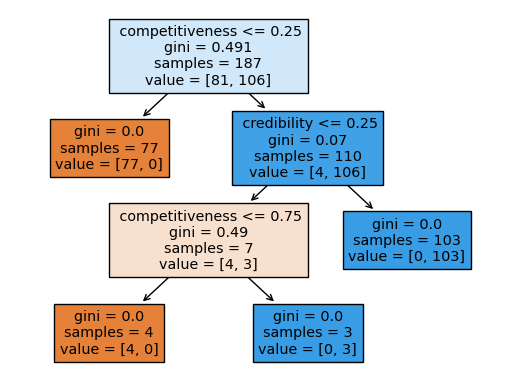

In [115]:
from sklearn import tree
tree.plot_tree(dt,feature_names=x.columns, filled=True)
plt.show()

# 5. Random forest classification

In [116]:
from sklearn.ensemble import RandomForestClassifier

In [117]:
# Create a random forest classifier
model1 = RandomForestClassifier()

In [118]:
# Train the model
model1.fit(x_train, y_train)

RandomForestClassifier()

In [119]:
# Make predictions on the testing set
y_pred = model1.predict(x_test)

In [120]:
y_pred

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0],
      dtype=int64)

In [121]:
print(f"Training Accuracy : {model1.score(x_train,y_train)}")
print(f"Testing Accuracy : {model1.score(x_test,y_test)}")
print(classification_report(y_test,y_pred))

Training Accuracy : 1.0
Testing Accuracy : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        37

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63



In [122]:
print(accuracy_score(y_test, y_pred))

1.0


In [123]:
print(f1_score(y_test, y_pred))

1.0


In [124]:
print(recall_score(y_test, y_pred))

1.0


In [125]:
print(precision_score(y_test, y_pred))

1.0


# 6. Adaboost Model

In [126]:
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, StackingClassifier, VotingClassifier
from xgboost import XGBClassifier

In [127]:
def predictions(model):
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  print(f"Training Accuracy : {model.score(x_train,y_train)}")
  print(f"Testing Accuracy : {model.score(x_test,y_test)}")
  print(classification_report(y_test,y_pred))

In [128]:
predictions(AdaBoostClassifier())

Training Accuracy : 1.0
Testing Accuracy : 0.9841269841269841
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        26
           1       1.00      0.97      0.99        37

    accuracy                           0.98        63
   macro avg       0.98      0.99      0.98        63
weighted avg       0.98      0.98      0.98        63



In [129]:
import pickle
pickle_out = open("model.pkl", "wb")
pickle.dump(AdaBoostClassifier, pickle_out)
pickle_out.close()

# Comparison of Models

# Using Lazypredict to check the accuracy of different algorithms on the data

In [130]:
from lazypredict.Supervised import LazyClassifier

In [131]:
X_train,X_test,y_train,y_test=train_test_split(bankrupt_new.drop(columns=['class_yn']),
                                              bankrupt_new['class_yn'],
                                              test_size=0.2,
                                              random_state=42)

In [132]:
clf=LazyClassifier(verbose=0,ignore_warnings=True,custom_metric=None)

In [133]:
models,predictions=clf.fit(X_train,X_test,y_train,y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.93it/s]


In [134]:
print(models)

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
GaussianNB                         1.00               1.00     1.00      1.00   
ExtraTreesClassifier               1.00               1.00     1.00      1.00   
LogisticRegression                 1.00               1.00     1.00      1.00   
QuadraticDiscriminantAnalysis      1.00               1.00     1.00      1.00   
RandomForestClassifier             1.00               1.00     1.00      1.00   
LabelSpreading                     1.00               1.00     1.00      1.00   
LabelPropagation                   1.00               1.00     1.00      1.00   
NuSVC                              1.00               1.00     1.00      1.00   
SVC                                1.00               1.00     1.00      1.00   
BernoulliNB                        1.00               1.00     1.00      1.00   
PassiveAggressiveClassifier 

# We have taken Random Forest classifier as our model with greater accuracy of prediction

In [136]:
#make pickle
import pickle
pickle.dump(model1,open('model.pkl','wb'))

In [138]:
from flask import Flask, request,jsonify, render_template
import pickle
#create flask app
app= Flask(__name__)

#load pickle model
model1= pickle.load(open('model.pkl','rb'))

@app.route("/")
def Home():
    return render_template('index1.html')

@app.route("/predict", methods=["POST"])

def predict():
    float_features=[float(x) for x in request.form.values()]
    features=[np.array(float_features)]
    prediction=model1.predict(features)
    if prediction[0]==0:
        ans= 'Bankrupt'
    else:
        ans='Non-Bankrupt'

    return render_template('index1.html',prediction_text="The company is "+ans)


if __name__=="__main__":
    app.run(debug= True)



 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

# By clicking on the link above you will be directed to the page that predicts bankruptcy and non bankruptcy